First task. power spectrum

Data length: 1048576
(1048576,)


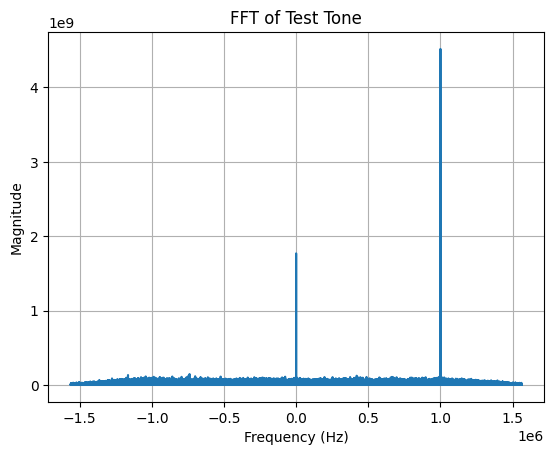

In [1]:
import numpy as np
import matplotlib.pyplot as plt
with open("test_tone.bin", "rb") as f:
     data = np.fromfile(f, dtype=np.complex64)
     
print("Data length:", len(data))

num = 2**20
freq = 3.125e6
data = data[:num]


fft = np.fft.fft(data)

print(fft.shape)

fftfreq = np.fft.fftfreq(num,1/freq)
shifted = np.fft.fftshift(fft)

shiftedfreq = np.fft.fftshift(fftfreq)
power = np.abs(shifted)**2
plt.plot(shiftedfreq, power)
#plt.xlim(-1e6, 1e6) These are not needed
#plt.ylim(0, 1e6)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Test Tone")
plt.grid()     
plt.show()

Second task. time frequency spectrum

/var/folders/lr/pld8m16d3c555_tynzkv73p80000gn/T/ipykernel_33660/4223390787.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  array[i] = data1[start:end]


spectra shape: (512, 4096)


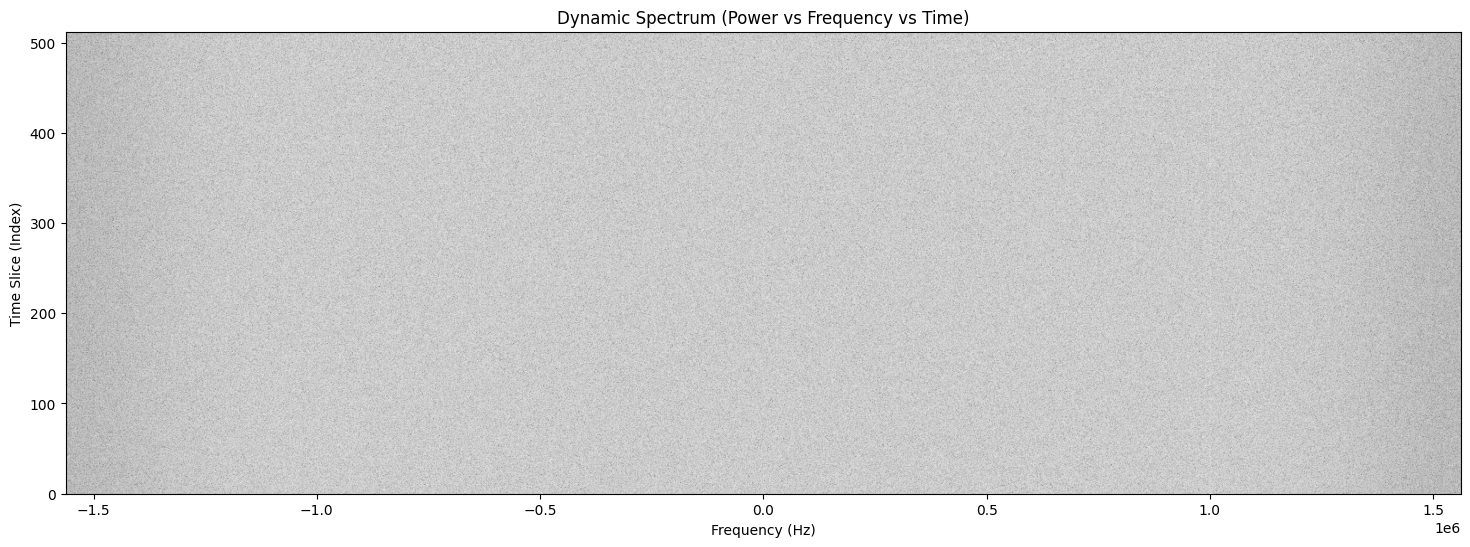

In [3]:
window_len = 4096
cycle = 512
freq = 3.125e6
hop_size = 1
fs = freq
# Total samples needed
total_samples_needed = (cycle - 1) * hop_size + window_len
data1 = np.fromfile("c000p0.bin", dtype=np.complex64, count = 512*4096) #, count=total_samples_needed

# Optional: assert to verify you got enough
if len(data1) < total_samples_needed:
    raise ValueError("Not enough data in file for the specified cycle and hop size")

array = np.empty((cycle, window_len))

for i in range(cycle):
    start = i * hop_size
    end = start + window_len
    array[i] = data1[start:end]

array = data1.reshape(512,4096)

spectra = np.fft.fft(array, axis=1)
spectra = np.abs(spectra)**2
print("spectra shape:", spectra.shape)

# Step 1: Frequency axis
freqs = np.fft.fftfreq(window_len, d=1/fs)  # in Hz
freqs_shifted = np.fft.fftshift(freqs)

# Step 2: Apply fftshift to spectra for frequency centering
spectra_shifted = np.fft.fftshift(spectra)

power = np.abs(spectra_shifted)**2

# Step 3: Convert to log scale (optional but improves visibility)
log_power = 10 * np.log10(power + 1e-12)

apply_log = True

# Step 4: Plot using imshow
plt.figure(figsize=(18, 6))
if(apply_log):
     plt.imshow(log_power, aspect='auto', cmap='gray',  # grayscale
           extent=[freqs_shifted[0], freqs_shifted[-1], 0, spectra.shape[0]],
           origin='lower')
else:
     plt.imshow(spectra_shifted, aspect='auto', cmap='gray',  # grayscale
           extent=[freqs_shifted[0], freqs_shifted[-1], 0, spectra.shape[0]],
           origin='lower')
     



# Step 5: Labels and color bar
plt.xlabel("Frequency (Hz)")
plt.ylabel("Time Slice (Index)")
plt.title("Dynamic Spectrum (Power vs Frequency vs Time)")
#plt.colorbar(label="Power (dB)")
#plt.tight_layout()
plt.show()